In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATA SET

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# CHECKING THE NULL VALUES

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.dropna(subset=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'],how='any',inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- NULL VALUES HAS BEEN CLEARED

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


# CHECKING THE RELATIONSHIP BETWEEN TWO VARIABLES USING HEATMAP

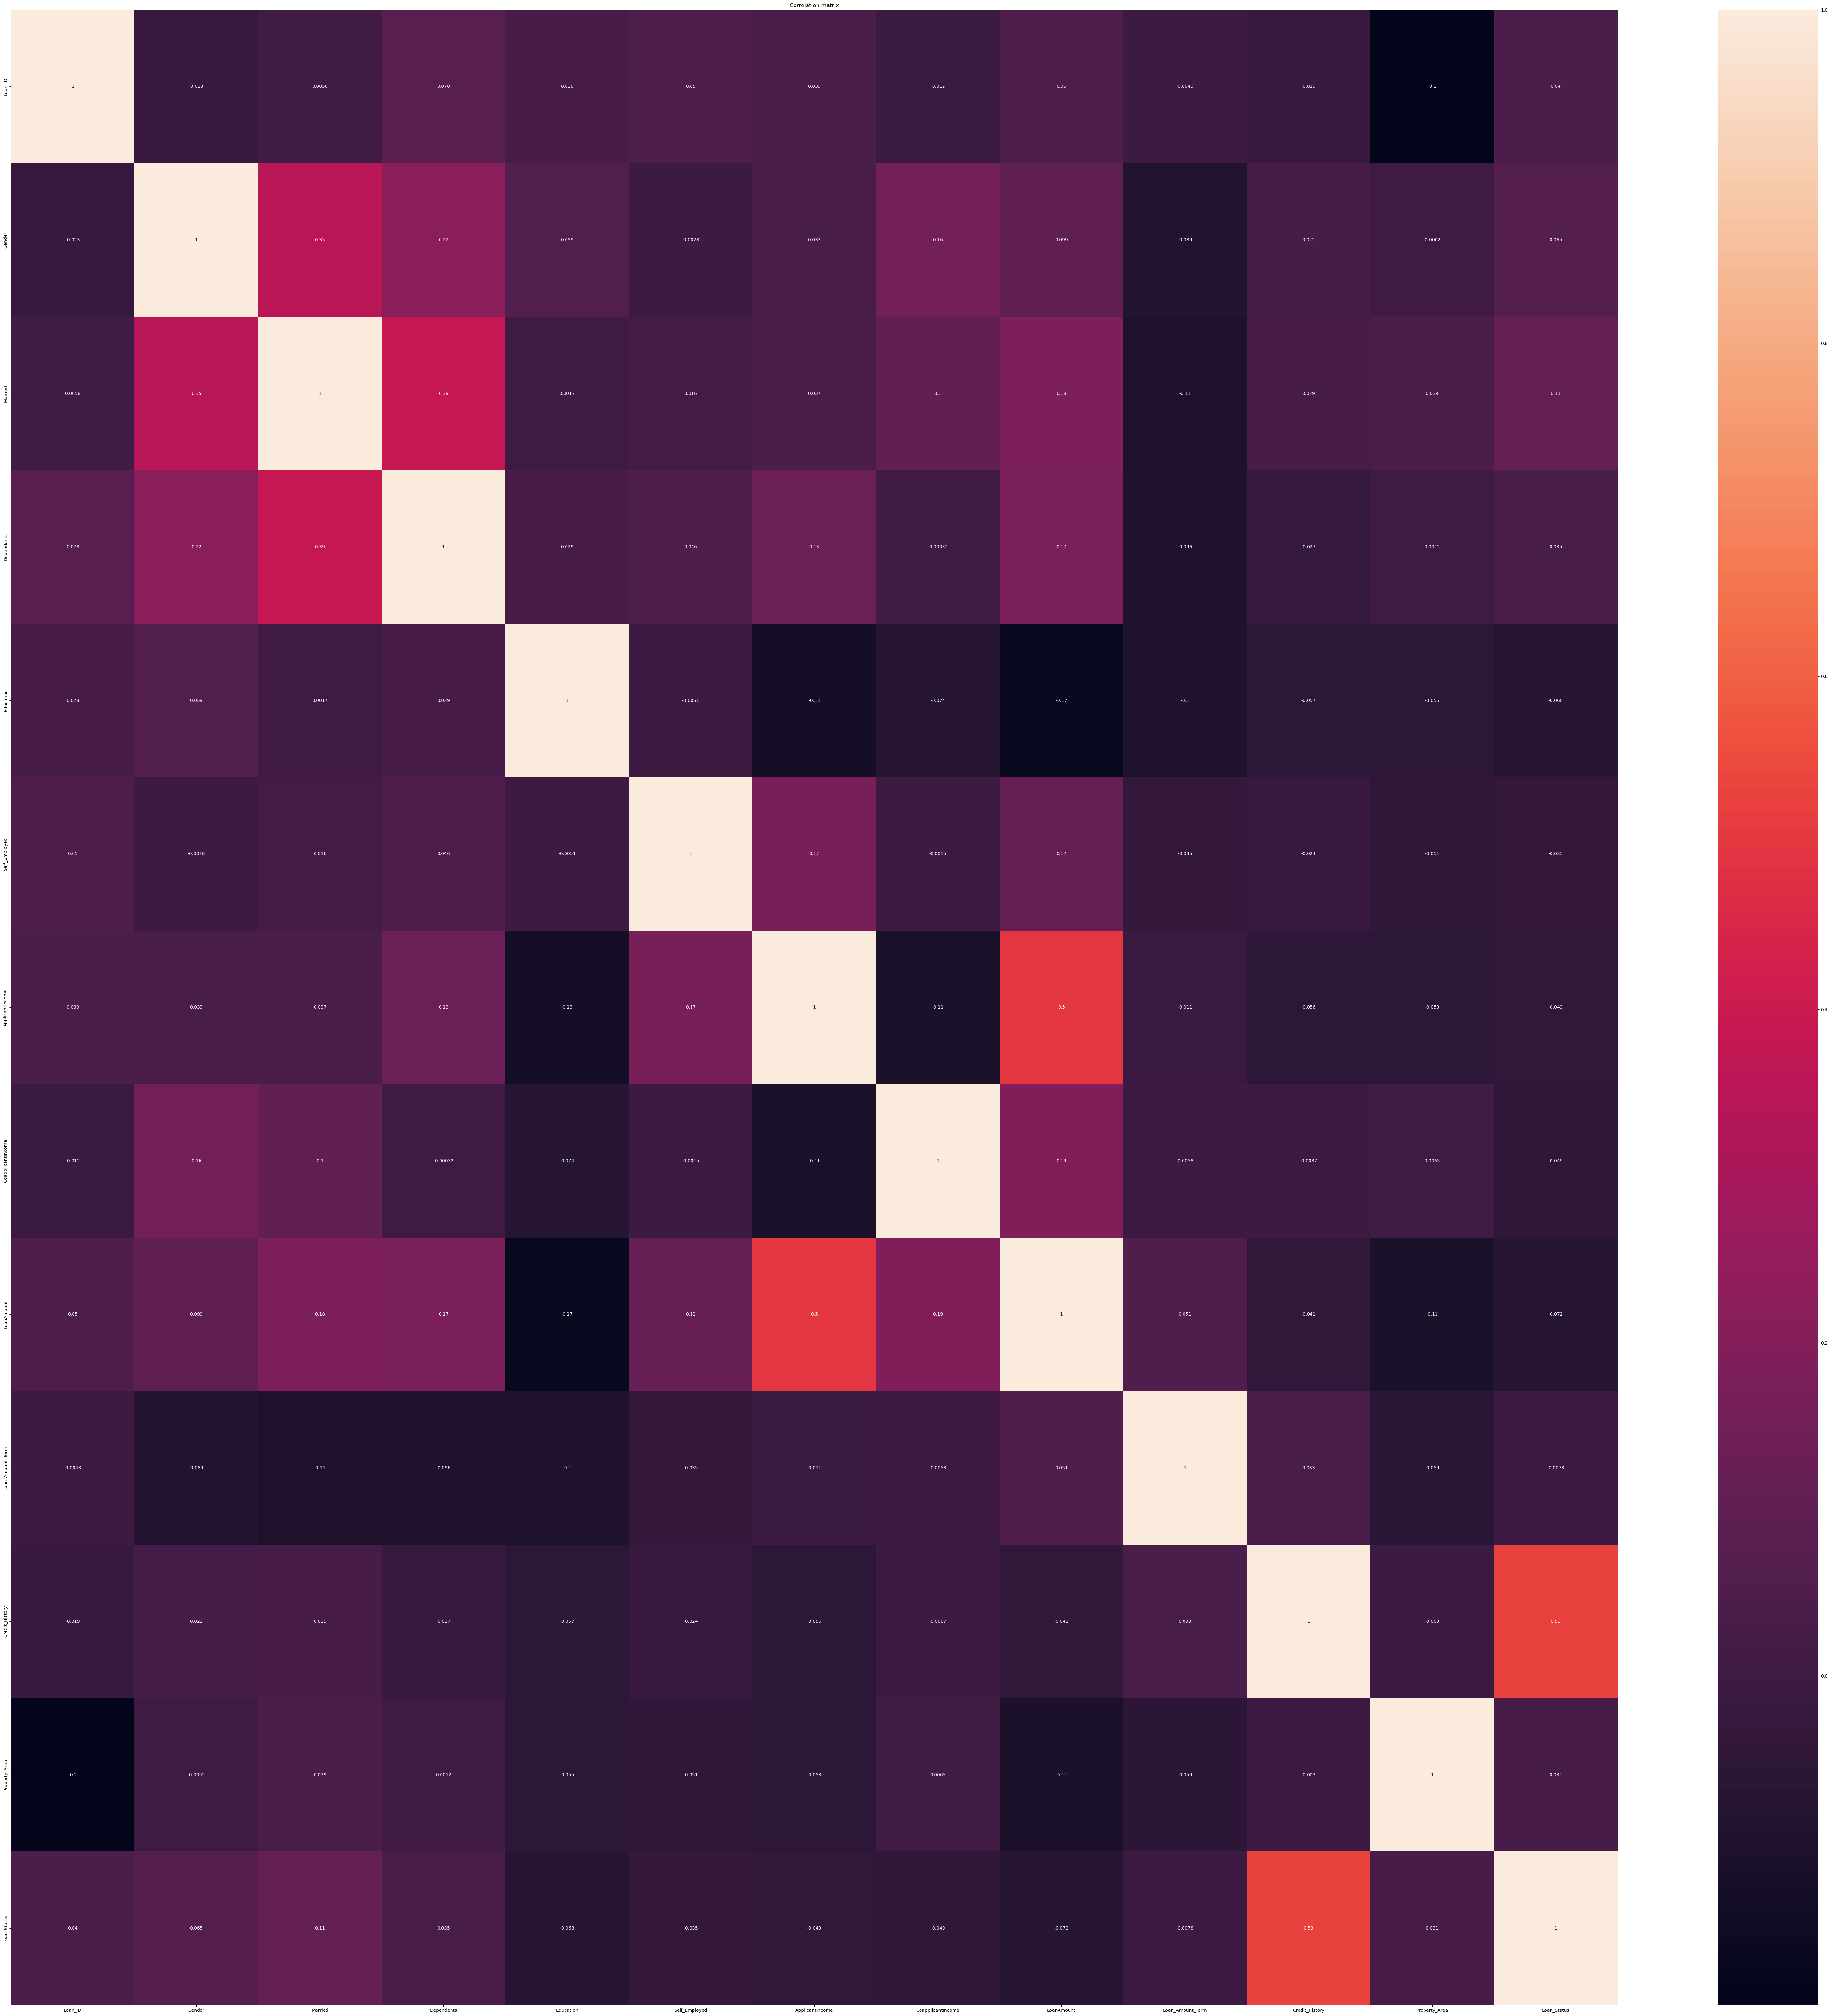

In [19]:
corr_mat=df.corr()
plt.figure(figsize=[80,80])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

- HERE ITS SEEN THAT CREDIT_HISTORY IS HIGHLY RELATED TO THE TARGET VARIABLE 

In [20]:
corr_matrix=df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
Gender               0.064504
Loan_ID              0.040306
Dependents           0.035428
Property_Area        0.031361
Loan_Amount_Term    -0.007798
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
Education           -0.068437
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64

# CHECKING THE DISTRIBUTION

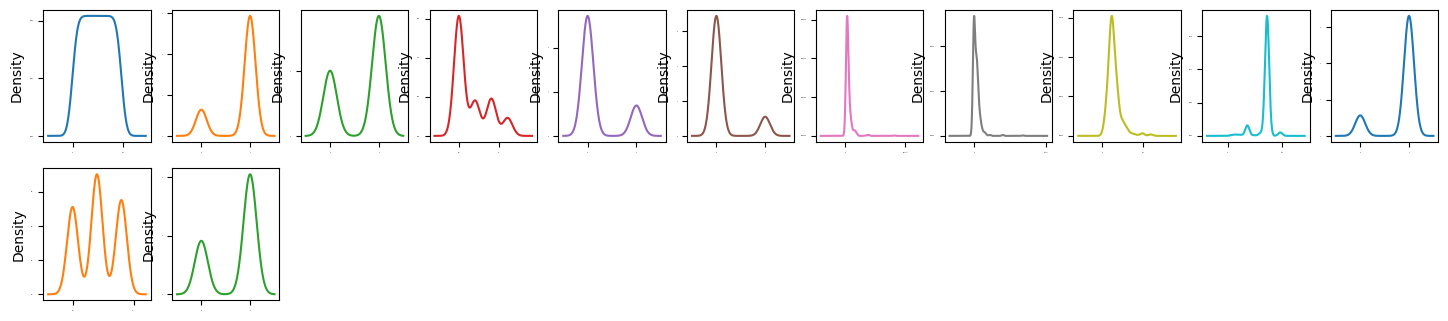

In [21]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

- HERE ITS NOTICABLE THAT SOME OF THE COLUMNS ARE SKEWED 

# PREPROCESSING

In [23]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [24]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,2.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,3.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0
5,4.0,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0
610,476.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0
611,477.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0
612,478.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0


In [25]:
y

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 480, dtype: float64

- CHECKING SKEWENESS

In [26]:
x.skew().sort_values(ascending=False)

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Self_Employed        2.111872
Education            1.488474
Dependents           0.942272
Loan_ID              0.000000
Property_Area       -0.039673
Married             -0.621334
Gender              -1.678471
Credit_History      -2.013253
Loan_Amount_Term    -2.333710
dtype: float64

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
features=['Loan_ID','Loan_ID','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

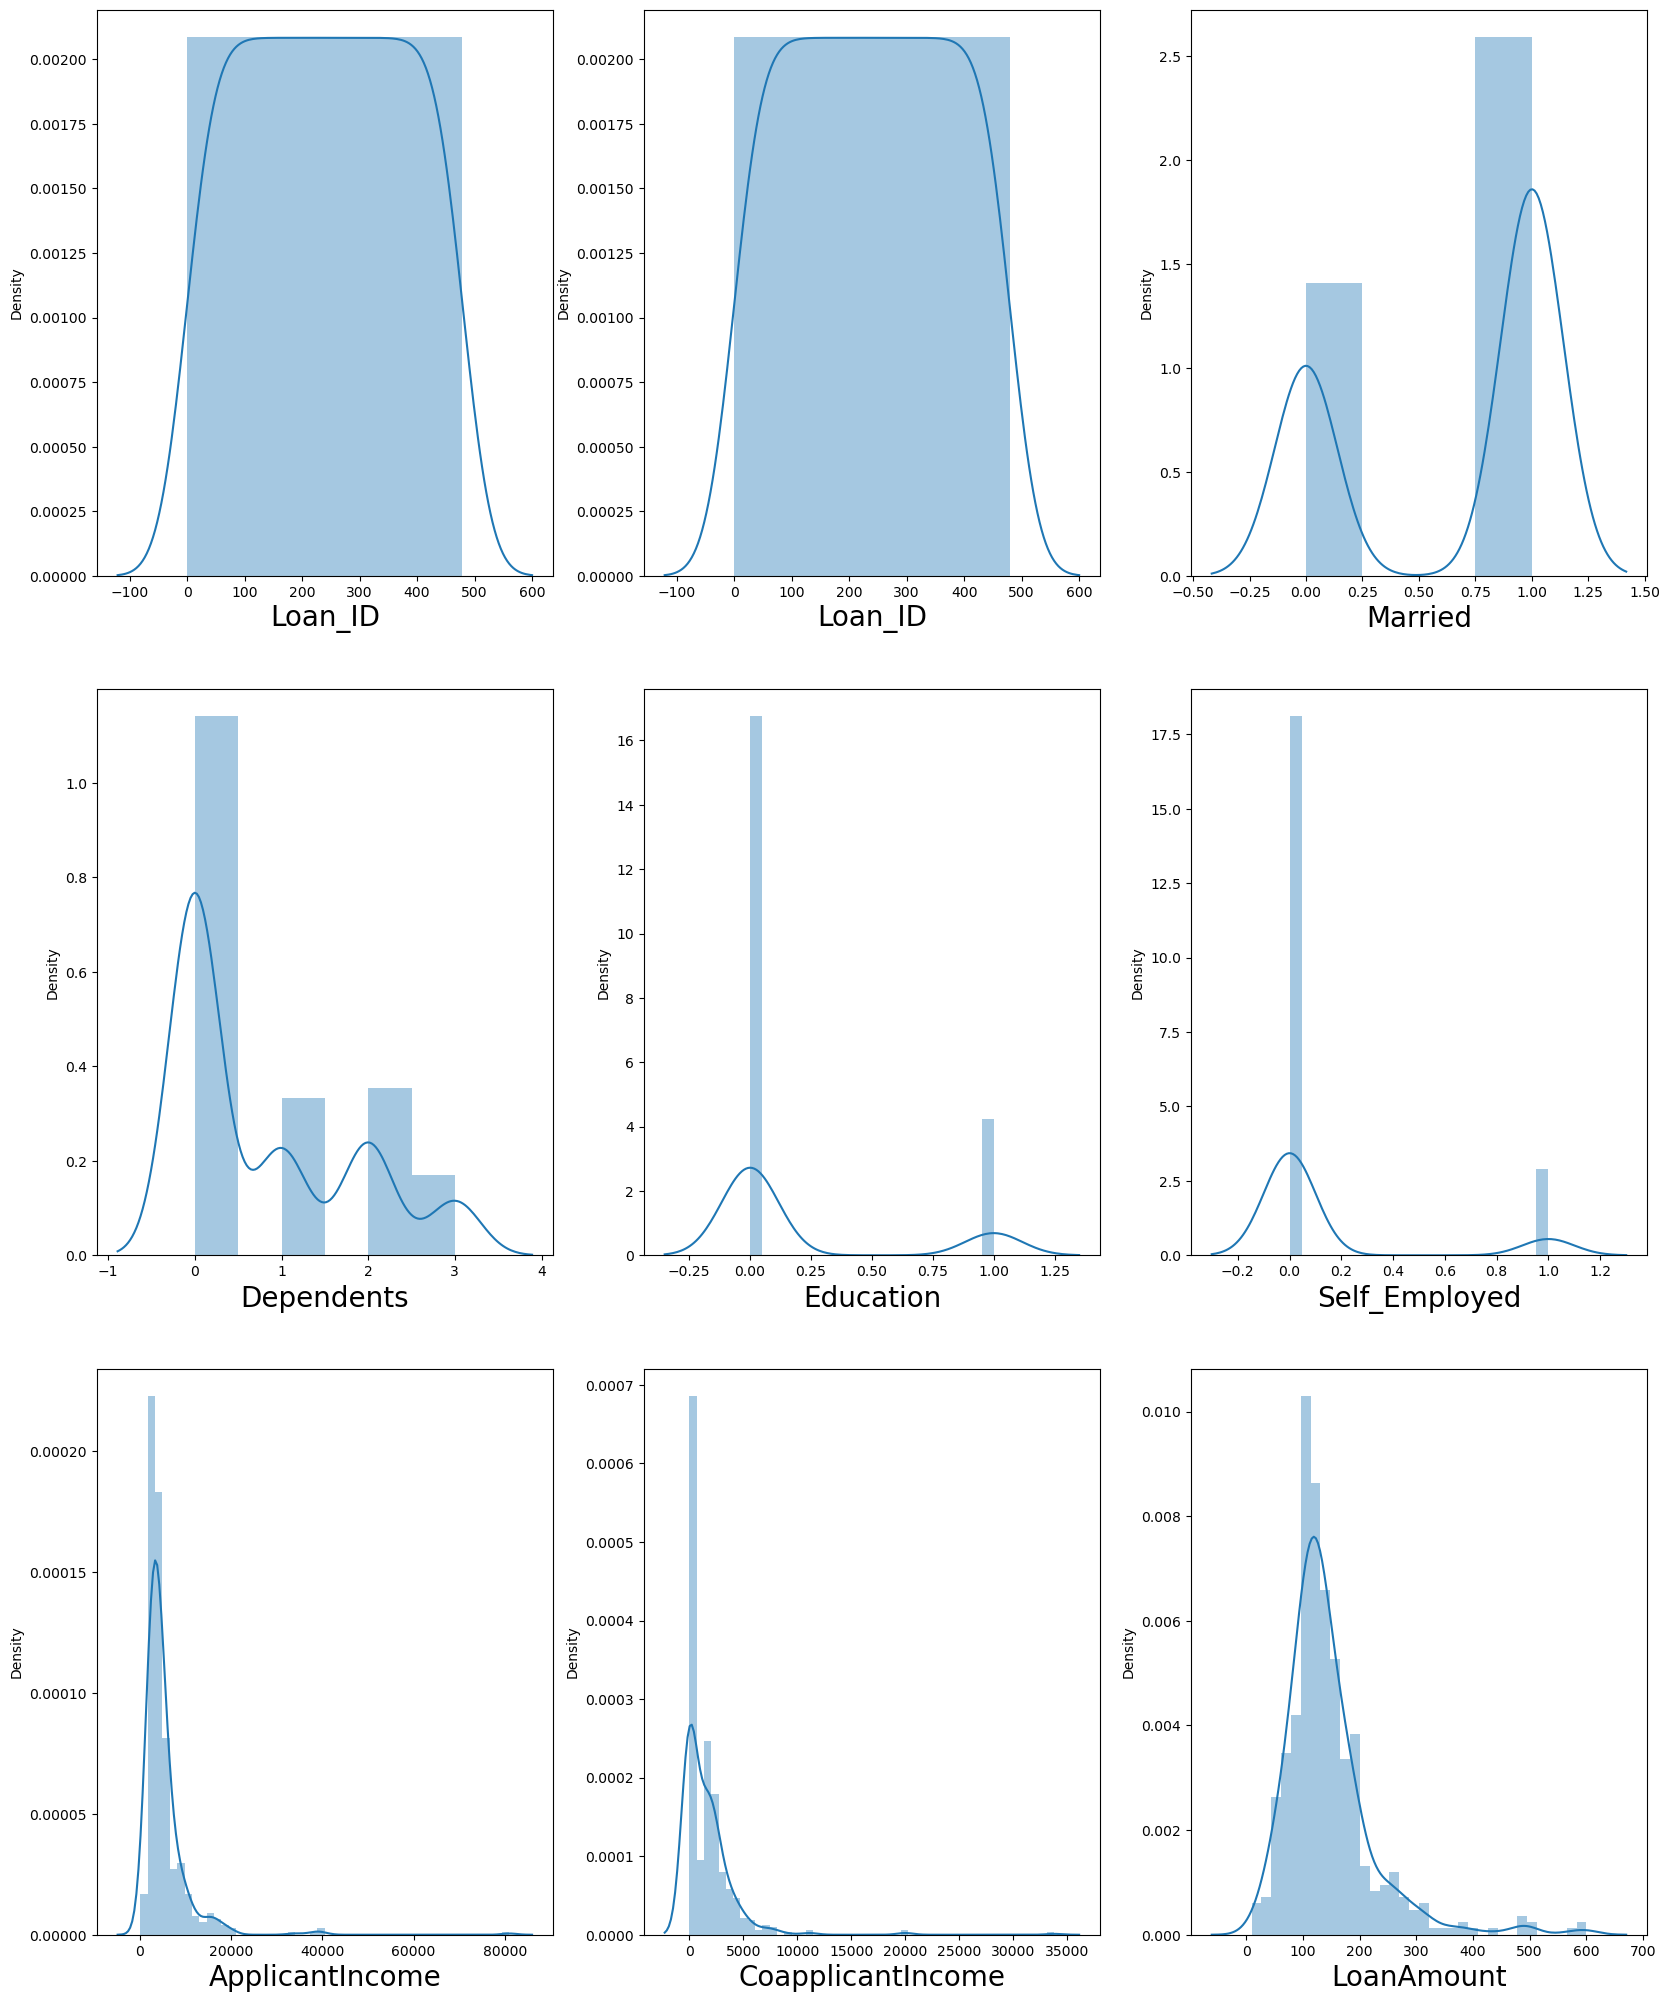

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [31]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson\n"

In [32]:
df[features]=scaler.fit_transform(df[features].values)

In [33]:
df[features]

,Loan_ID,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,-2.149046,-2.149046,0.737162,0.786423,-0.503253,-0.399275,0.164670,0.766892,-0.029189,0.174422,0.413197,-1.354721
2,-2.119404,-2.119404,0.737162,-0.851464,-0.503253,2.504541,-0.538339,-1.091163,-1.281195,0.174422,0.413197,1.224154
3,-2.093951,-2.093951,0.737162,-0.851464,1.987072,-0.399275,-0.796236,0.904508,-0.156488,0.174422,0.413197,1.224154
4,-2.070885,-2.070885,-1.356553,-0.851464,-0.503253,-0.399275,0.591486,-1.091163,0.163801,0.174422,0.413197,1.224154
5,-2.049446,-2.049446,0.737162,1.277424,-0.503253,2.504541,0.431341,1.086684,1.505559,0.174422,0.413197,1.224154
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.531974,1.531974,-1.356553,-0.851464,-0.503253,-0.399275,-0.596311,-1.091163,-1.149005,0.174422,0.413197,-1.354721
610,1.537540,1.537540,0.737162,1.507472,-0.503253,-0.399275,-0.013885,-1.091163,-2.149682,-2.278046,0.413197,-1.354721
611,1.543102,1.543102,0.737162,0.786423,-0.503253,-0.399275,1.044108,0.233802,1.387711,0.174422,0.413197,1.224154
612,1.548660,1.548660,0.737162,1.277424,-0.503253,-0.399275,0.950234,-1.091163,0.742412,0.174422,0.413197,1.224154


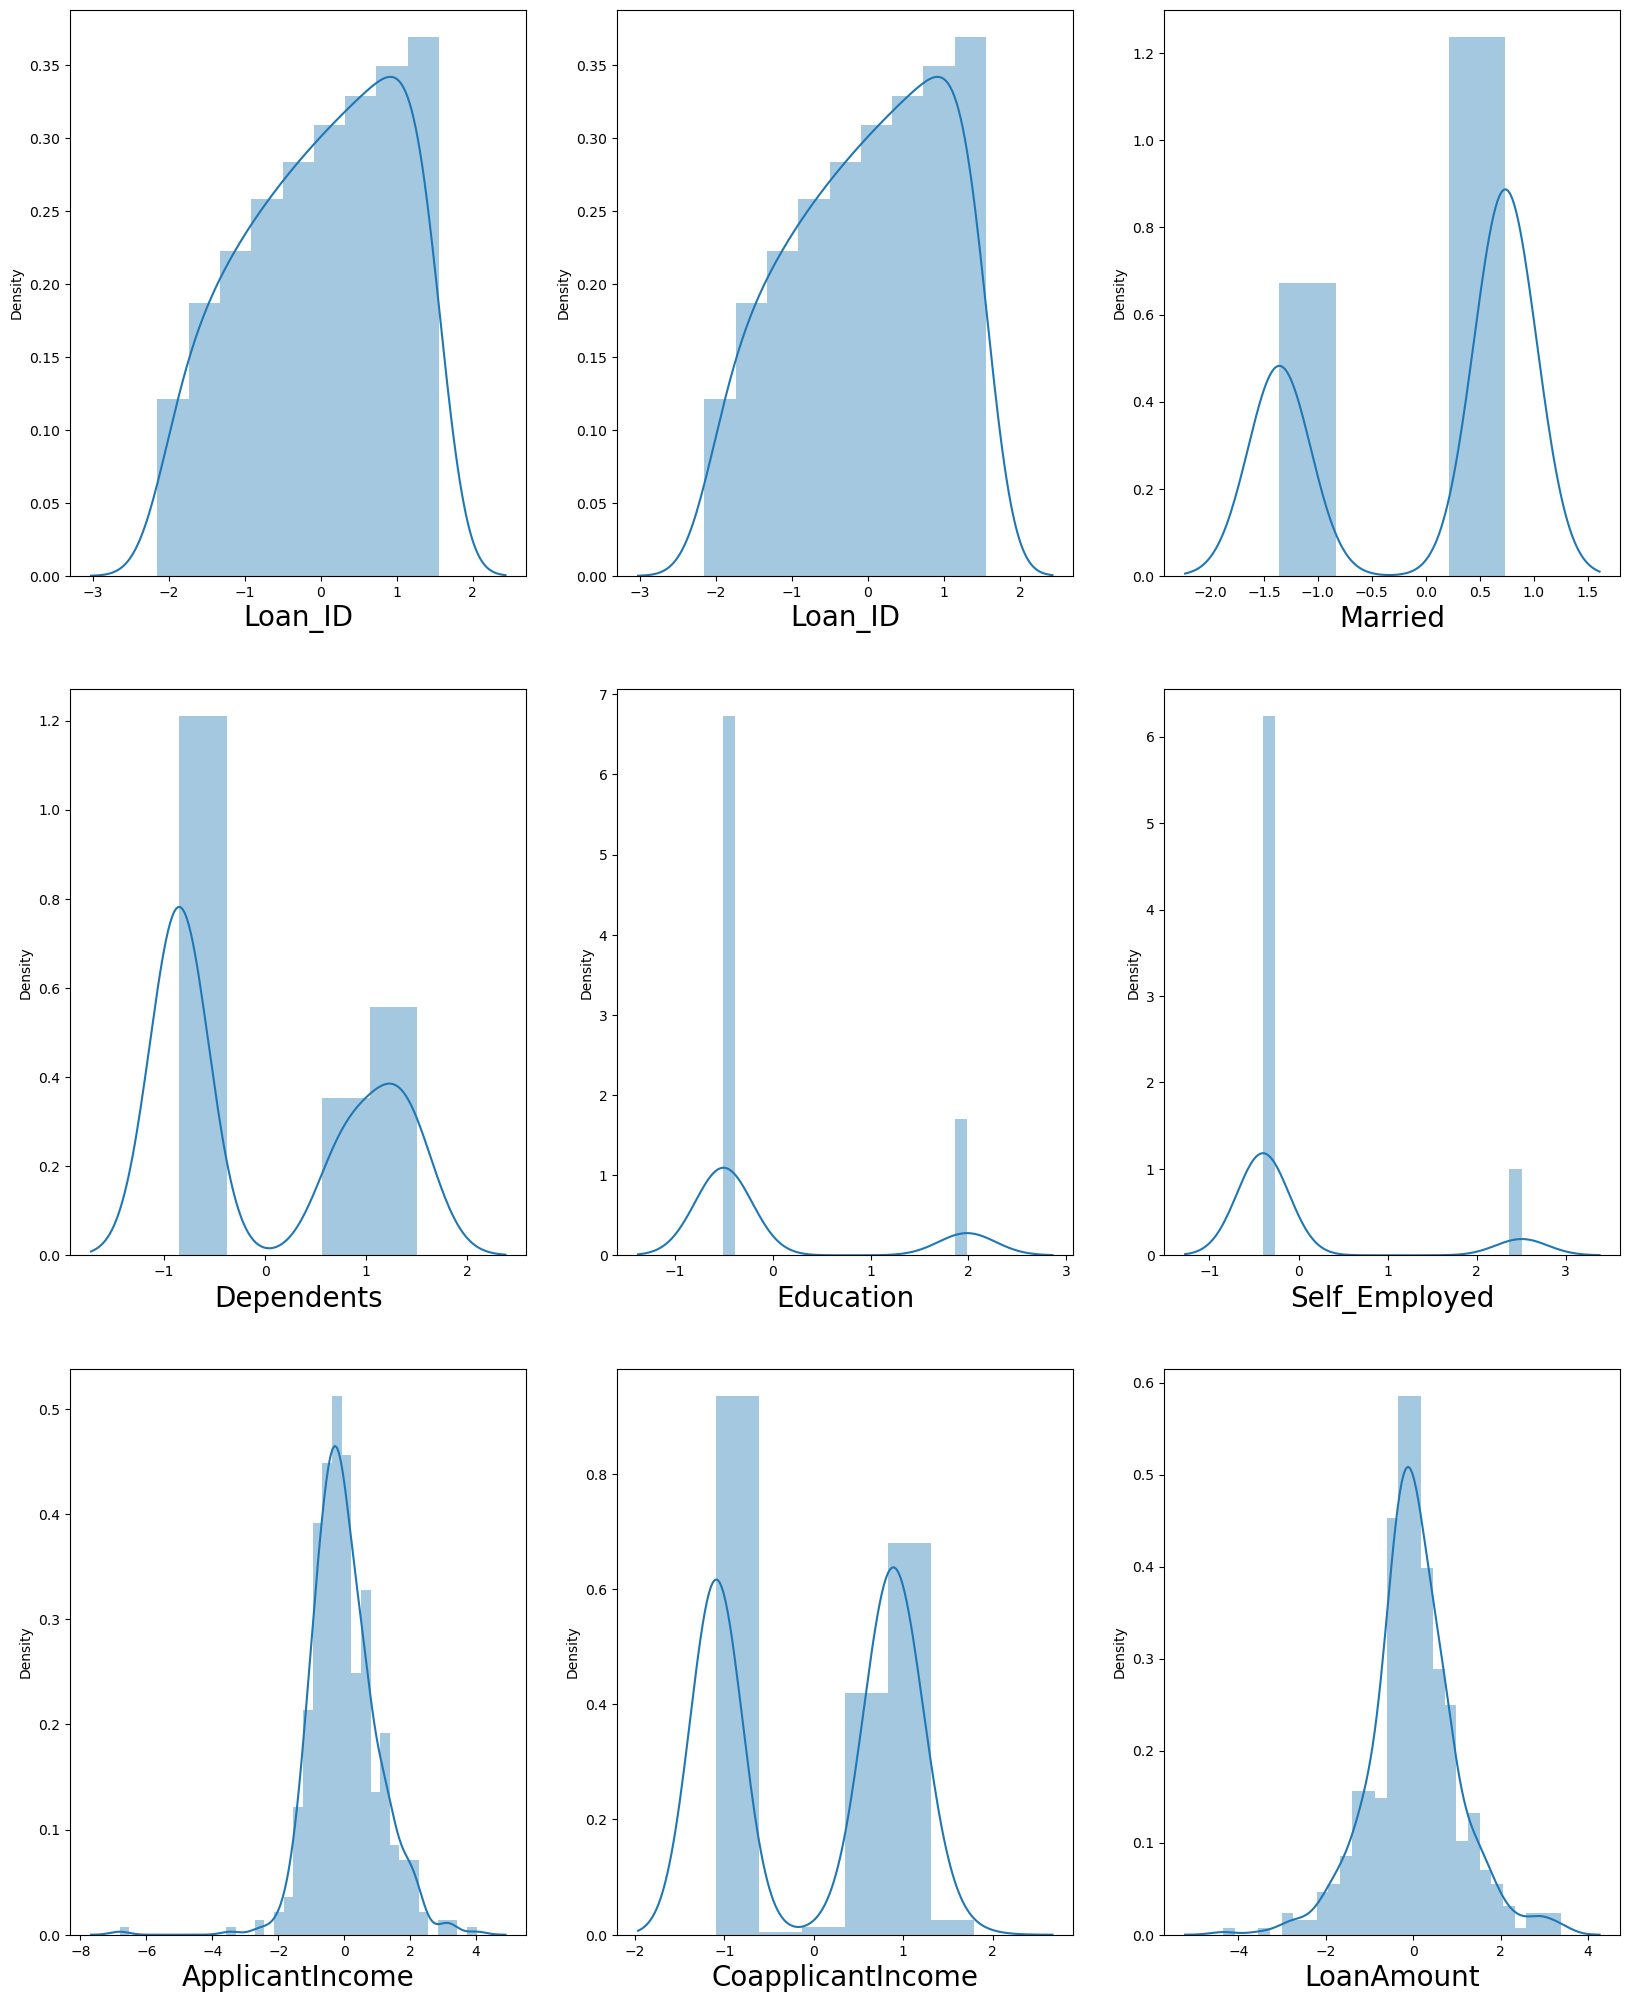

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df[features]:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [35]:
x.skew().sort_values(ascending=False)

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Self_Employed        2.111872
Education            1.488474
Dependents           0.942272
Loan_ID              0.000000
Property_Area       -0.039673
Married             -0.621334
Gender              -1.678471
Credit_History      -2.013253
Loan_Amount_Term    -2.333710
dtype: float64

# CHECKING FOR OUTLIERS

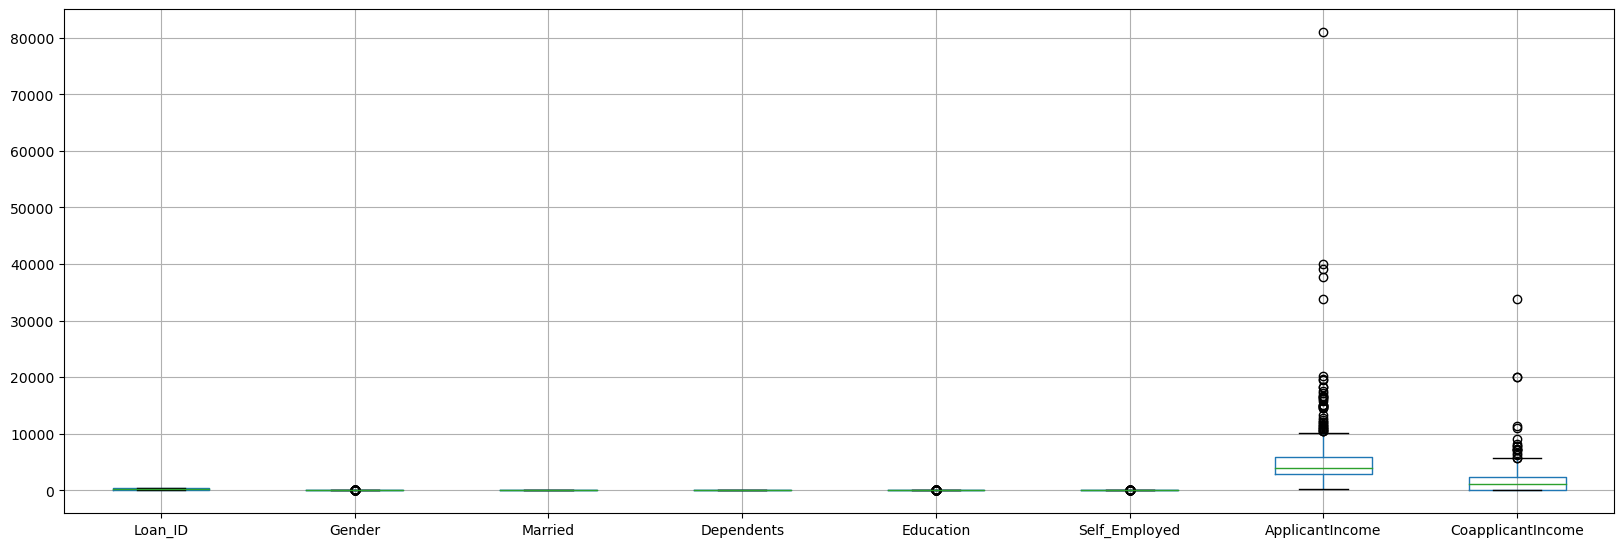

In [36]:
x.iloc[:,0:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [37]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

False

<AxesSubplot:xlabel='ApplicantIncome'>

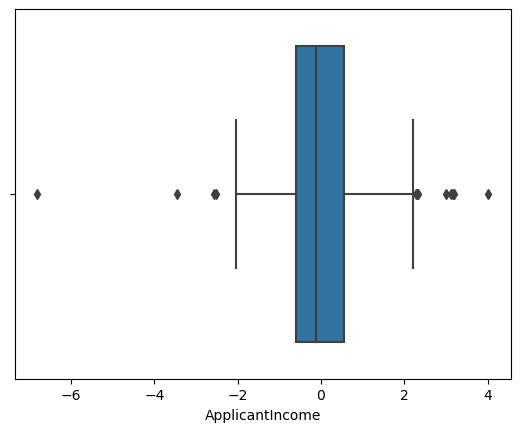

In [42]:
sns.boxplot(df['ApplicantIncome'])

In [44]:
upper_limit=df['ApplicantIncome'].mean() + 3*df['ApplicantIncome'].std()
lower_limit=df['ApplicantIncome'].mean() - 3*df['ApplicantIncome'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 3.0031298913050835
lower_limit: -3.0031298913050914


In [45]:
df.loc[(df['ApplicantIncome'] > upper_limit)| (df['ApplicantIncome'] < lower_limit)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,-0.787735,1.0,0.737162,1.507472,-0.503253,-0.399275,3.200629,-1.091163,3.386726,-2.278046,-2.420153,0.024519,1.0
185,-0.594472,1.0,0.737162,-0.851464,-0.503253,2.504541,3.174559,1.126598,-0.156488,0.174422,0.413197,0.024519,1.0
216,-0.395290,1.0,0.737162,-0.851464,-0.503253,-0.399275,-6.804526,0.821001,0.076714,0.174422,0.413197,-1.354721,0.0
409,0.615165,1.0,0.737162,1.507472,-0.503253,-0.399275,4.014928,-1.091163,2.175651,0.174422,-2.420153,-1.354721,0.0
443,0.787876,1.0,-1.356553,0.786423,-0.503253,-0.399275,3.129390,-1.091163,0.315508,0.174422,0.413197,0.024519,1.0
500,1.045504,0.0,-1.356553,-0.851464,-0.503253,-0.399275,-3.446838,1.044988,-0.273993,4.067383,0.413197,-1.354721,1.0


In [47]:
#TRIMING THE DATA
new_df=df.loc[(df['ApplicantIncome']<upper_limit)& (df['ApplicantIncome']>lower_limit)]
print('before removing outlier :',len(df))
print('after removing outlier :',len(new_df))
print('outliers:',len(df)-len(new_df))


before removing outlier : 480
after removing outlier : 474
outliers: 6


<AxesSubplot:xlabel='ApplicantIncome'>

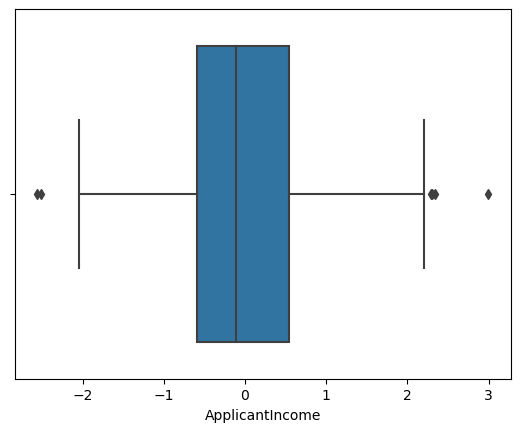

In [49]:
sns.boxplot(new_df['ApplicantIncome'])

- NOW WE CAN SEE THE OUTLIERS HAS BEEN REDUCED AND PUSHED 

In [50]:
new_df=df.copy()
new_df.loc[new_df['ApplicantIncome']>upper_limit,'ApplicantIncome']=upper_limit
new_df.loc[new_df['ApplicantIncome']<lower_limit,'ApplicantIncome']=lower_limit

<AxesSubplot:xlabel='ApplicantIncome'>

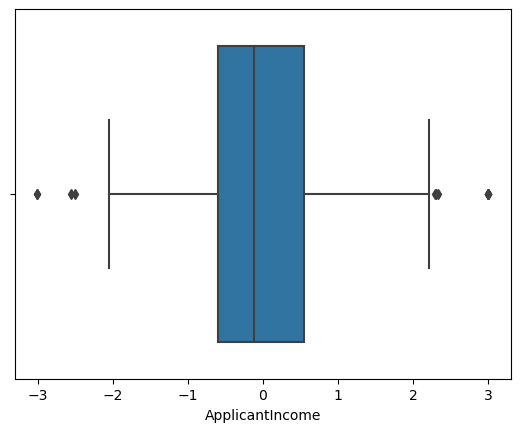

In [52]:
sns.boxplot(new_df['ApplicantIncome'])

- capped data sucessfully

# SINCE THE OUTLIERS AND SKEWNESS IS REMOVED , MOVING TO THE TRAINING PROCESS

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score


In [55]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.75 random_state 1
max_accuracy 0.75 max_random_state 1
testing accuracy 0.75 random_state 2
testing accuracy 0.75 random_state 3
testing accuracy 0.7291666666666666 random_state 4
testing accuracy 0.8020833333333334 random_state 5
max_accuracy 0.8020833333333334 max_random_state 5
testing accuracy 0.8541666666666666 random_state 6
max_accuracy 0.8541666666666666 max_random_state 6
testing accuracy 0.71875 random_state 7
testing accuracy 0.75 random_state 8
testing accuracy 0.71875 random_state 9
testing accuracy 0.8020833333333334 random_state 10
testing accuracy 0.71875 random_state 11
testing accuracy 0.7708333333333334 random_state 12
testing accuracy 0.6979166666666666 random_state 13
testing accuracy 0.875 random_state 14
max_accuracy 0.875 max_random_state 14
testing accuracy 0.8333333333333334 random_state 15
testing accuracy 0.8020833333333334 random_state 16
testing accuracy 0.8020833333333334 random_state 17
testing accuracy 0.8020833333333334 random_state 

In [56]:
print("Best Accuracy is ",maxAccu,"on random_state",maxRS)

Best Accuracy is  0.8854166666666666 on random_state 44


- NEXT STEP IS TO PASS THIS VALUE AS THE VALUE OF RANDOM STATE AND MAKE THE SPLIT

- LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 61.458333333333336
[[ 5 30]
 [ 7 54]]
              precision    recall  f1-score   support

         0.0       0.42      0.14      0.21        35
         1.0       0.64      0.89      0.74        61

    accuracy                           0.61        96
   macro avg       0.53      0.51      0.48        96
weighted avg       0.56      0.61      0.55        96



- LOGISTIC REGRESSION IS GIVING A VERY LESS SCORE

- DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=LR.predict(x_test)
pred_train_dtc=dt.predict(x_train)
print("Testiing Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Testiing Accuracy 61.458333333333336
Training Accuracy 100.0
Accuracy 61.458333333333336
[[ 5 30]
 [ 7 54]]
              precision    recall  f1-score   support

         0.0       0.42      0.14      0.21        35
         1.0       0.64      0.89      0.74        61

    accuracy                           0.61        96
   macro avg       0.53      0.51      0.48        96
weighted avg       0.56      0.61      0.55        96



- RANDOMFORESTCLASSIFIER

In [59]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 77.08333333333334
[[18 17]
 [ 5 56]]
              precision    recall  f1-score   support

         0.0       0.78      0.51      0.62        35
         1.0       0.77      0.92      0.84        61

    accuracy                           0.77        96
   macro avg       0.77      0.72      0.73        96
weighted avg       0.77      0.77      0.76        96



In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=df.drop('Loan_Status',axis=1)
X_scaled=scaler.fit_transform(x)

In [63]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=12)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.997357,0.810862,-0.419953,-1.048553,-0.033135,0.903612,-0.303617,-0.556153,1.233184,1.759817,0.150249,-0.525668
1,0.607470,0.066433,-2.365226,0.403731,0.111589,1.962644,1.571188,1.171266,-0.675701,1.210999,-1.176031,0.429384
2,0.344819,2.295501,-1.235355,-0.060422,0.604623,1.514357,0.683270,-1.375614,0.368667,-0.832531,-0.620109,0.077090
3,1.120060,-0.770383,-2.287432,-0.826596,0.285164,0.859532,-0.289816,-1.157523,-0.611752,0.267918,0.453988,0.303411
4,-2.349068,-0.173646,-1.940421,-0.728402,0.744845,1.747662,1.726637,0.967662,0.646821,-0.111125,0.747486,0.304587
...,...,...,...,...,...,...,...,...,...,...,...,...
475,2.726974,-1.219919,1.600887,0.198978,-1.100438,-0.849531,-0.512370,0.779468,0.625957,0.255592,-0.146172,0.028517
476,-0.502400,0.215861,0.534186,2.577813,-2.033431,-1.148184,-1.515499,0.855992,-0.079553,1.674579,-0.053717,-0.541099
477,-1.849743,-0.613676,-0.232314,-0.497308,-0.603436,-1.367180,0.103175,-0.031304,-0.674019,-1.463458,0.059796,0.017484
478,-1.462229,-0.992449,-0.622504,0.281366,-1.004790,-1.906516,0.367997,-0.249945,-0.758247,-0.648440,-0.120611,0.327085


In [64]:
df['Loan_Status']=df['Loan_Status'].replace({'M':1,'B':0})#replacing for the coputer to understand
y=df['Loan_Status']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [66]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n===============Train Result==================")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:2f}%")
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print('\n==================Test Result===============')
        
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
            
        print('\n \n Test classification report \n ',classification_report(y_test,pred,digits=2))

- SVC

In [67]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Result==================
Accuracy Score: 83.611111%

==================Test Result===============
Accuracy Score:84.166667%

 
 Test classification report 
                precision    recall  f1-score   support

         0.0       0.88      0.45      0.60        31
         1.0       0.84      0.98      0.90        89

    accuracy                           0.84       120
   macro avg       0.86      0.71      0.75       120
weighted avg       0.85      0.84      0.82       120



- SVC HAS INCREACED THE SCORES WITH A GREAT IMPACT

# ROC AUC CURVE

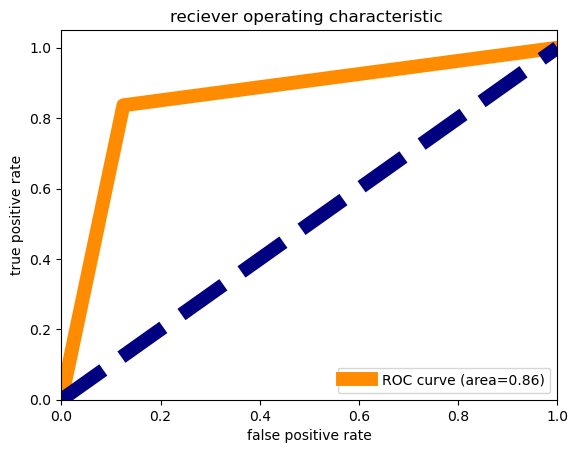

In [75]:
pred_test=svc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciever operating characteristic ')
plt.legend(loc="lower right")
plt.show()

# SAVING THE MODEL

In [92]:
import pickle
filename='loan_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))